In [5]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math; import re
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point; from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; from scipy.interpolate import griddata
from matplotlib.path import Path; from numpy import nan; import gsw

In [6]:
import matplotlib as mpl

### SMAB - polygon_v 

In [302]:
# density-based SMAB
seasonyeardepth_len = [140, 909, 1563, 145, 309, 242, 310, 419, 1340, 132, 491, ]
countwithinpolygon_list = [169, 1178, 2035, 174, 649, 508, 818, 728, 1982, 174, 572, ]
diff = [29, 269, 472, 29, 340, 266, 508, 309, 642, 42, 81, ]
mld_mean = [39.47142857142857, 31.386138613861387, 22.213051823416507, 23.4, 10.472491909385113, 8.690082644628099, 8.77741935483871, 8.77565632458234, 11.876119402985074, 21.689393939393938, 21.09775967413442, ]
mld_std = [24.69483545114613, 23.757888281721268, 18.231925444167025, 15.796725981168944, 5.972162006602472, 2.7632148290563605, 2.5334166242218146, 2.678880405236976, 5.26785774670067, 12.84413117705112, 12.014019944437381, ]
mld_max = [128.0, 179.0, 177.0, 114.0, 49.0, 21.0, 30.0, 20.0, 48.0, 59.0, 81.0, ]
mld_min = [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ]
mld_q25 = [19.0, 14.0, 10.0, 13.0, 7.0, 7.0, 7.0, 7.0, 8.0, 12.0, 11.0, ]
mld_q75 = [53.25, 41.0, 29.0, 28.0, 12.0, 10.0, 10.0, 10.0, 14.0, 30.0, 27.0, ]

ratio_mean = [0.5584531693862638, 0.5340014537939606, 0.4685282058103854, 0.4373037791954001, 0.2297858080020769, 0.20403076921798838, 0.16537040050591867, 0.19161627196428183, 0.32627352623656497, 0.40694321377622217, 0.5216711825562155, ]
ratio_std = [0.268180723301162, 0.2831891914902862, 0.26373781203483776, 0.2658791470306868, 0.16075894858597298, 0.11404796223662514, 0.06881515641417804, 0.11660904568011292, 0.21369030588375137, 0.2268435094441364, 0.2767786590385974, ]
ratio_max = [0.9666666666666667, 1.0, 0.9836065573770492, 0.96, 0.9245283018867925, 0.8076923076923077, 0.5084745762711864, 0.6818181818181818, 1.0, 0.975, 0.9795918367346939, ]
ratio_min = [0.06976744186046512, 0.03428571428571429, 0.0379746835443038, 0.04316546762589928, 0.04794520547945205, 0.05714285714285714, 0.03684210526315789, 0.03278688524590164, 0.03, 0.0546875, 0.04081632653061224, ]
ratio_q25 = [0.33394736842105266, 0.27835051546391754, 0.2457578372159908, 0.18487394957983194, 0.12280701754385964, 0.12121899576527526, 0.11955223880597014, 0.10741758241758242, 0.14938239835306227, 0.23036858974358973, 0.26572528883183566, ]
ratio_q75 = [0.8337378640776699, 0.8125, 0.6900656814449918, 0.6206896551724138, 0.2826086956521739, 0.24861111111111112, 0.20234375, 0.24, 0.46222527472527475, 0.5699404761904762, 0.7916666666666666, ]

In [ ]:
# with a smaller standard deviation (no regional differences)


In [303]:
# temp-based SMAB
t_seasonyeardepth_len = [107, 668, 1103, 91, 383, 327, 444, 546, 1526, 119, 293 ]
t_countwithinpolygon_list = [169, 1178, 2035, 174, 649, 508, 818, 728, 1982, 174, 572 ]
t_diff = [62, 510, 932, 83, 266, 181, 374, 182, 456, 55, 279 ]
t_mld_mean = [39.88785046728972, 30.251497005988025, 22.786038077969174, 29.164835164835164, 10.10443864229765, 8.825688073394495, 9.144144144144144, 9.6007326007326, 13.540629095674968, 24.10924369747899, 24.341296928327644 ]
t_mld_std = [22.261540996279702, 21.53307400725885, 17.30818998636689, 23.091439704145603, 4.840490247247957, 2.9236273708561464, 2.613536649266718, 3.0215828357434678, 6.210008673911638, 12.055745808162667, 13.680143092874665 ]
t_mld_max = [110.0, 136.0, 115.0, 103.0, 49.0, 21.0, 30.0, 22.0, 51.0, 56.0, 86.0 ]
t_mld_min = [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0 ]
t_mld_q25 = [30.5, 14.0, 10.0, 12.0, 7.0, 7.0, 7.0, 7.0, 9.0, 15.0, 13.0 ]
t_mld_q75 = [50.25, 40.25, 31.0, 42.0, 12.0, 10.0, 11.0, 11.0, 17.0, 31.0, 33.0 ]

t_ratio_mean = [0.48158829159255745, 0.4488050616945592, 0.3957337577632309, 0.3448398794027648, 0.21402132412712607, 0.20582380434825487, 0.17322241545747089, 0.21048252120873587, 0.3305380187966853, 0.41478775388899014, 0.43038520619986576 ]
t_ratio_std = [0.22919342587608713, 0.22971229754255093, 0.21134548469257103, 0.2196056068310176, 0.11654191345782507, 0.10578124707385436, 0.07455384403230025, 0.12144952783438902, 0.1986352187749512, 0.19952793202602598, 0.22284839641075074 ]
t_ratio_max = [0.9052631578947369, 0.9416666666666667, 0.9351851851851852, 0.8260869565217391, 0.76, 0.7272727272727273, 0.5084745762711864, 0.7727272727272727, 0.9, 0.8536585365853658, 0.9210526315789473 ]
t_ratio_min = [0.03314917127071823, 0.03428571428571429, 0.04225352112676056, 0.04316546762589928, 0.03821656050955414, 0.04142011834319527, 0.03684210526315789, 0.03333333333333333, 0.03208556149732621, 0.09090909090909091, 0.047619047619047616]
t_ratio_q25 = [0.28313511196828456, 0.2612433862433863, 0.21875, 0.15452079566003618, 0.1259920634920635, 0.125, 0.11648550724637681, 0.1206896551724138, 0.16845062093435836, 0.24807692307692308, 0.24 ]
t_ratio_q75 = [0.6479569892473118, 0.6280730897009967, 0.5643093465674112, 0.526049368672506, 0.27622890682318413, 0.2582010582010582, 0.21285315660969656, 0.27225378787878785, 0.4660714285714286, 0.5642988364972443, 0.6212121212121212 ]

### NMAB - polygon_x 

In [320]:
# density-based NMAB
seasonyeardepth_len = [134, 545, 781, 289, 225, 190, 88, 228, 759, 387, 348, 57]
countwithinpolygon_list = [147, 663, 1000, 341, 363, 389, 299, 449, 938, 460, 405, 68]
diff = [13, 118, 219, 52, 138, 199, 211, 221, 179, 73, 57, 11]
mld_mean = [40.32089552238806, 34.36330275229358, 22.357234314980793, 24.269896193771626, 11.053333333333333, 10.321052631578947, 7.8977272727272725, 9.333333333333334, 14.02635046113307, 21.478036175710596, 28.724137931034484, 34.29824561403509]
mld_std = [17.454247546284968, 18.55604286227282, 16.362543169798172, 13.987011782548166, 6.477777396607574, 5.52954542220039, 3.2440146729549646, 4.668232819902913, 7.025220235368986, 11.472533575211287, 14.34464107968941, 15.71005367259495]
mld_max = [89.0, 102.0, 96.0, 80.0, 46.0, 39.0, 33.0, 41.0, 57.0, 58.0, 77.0, 66.0]
mld_min = [7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0]
mld_q25 = [26.0, 19.0, 10.0, 12.0, 7.0, 7.0, 6.0, 7.0, 9.0, 12.0, 18.0, 20.0]
mld_q75 = [54.0, 49.0, 30.0, 33.0, 13.0, 11.0, 8.25, 10.0, 17.0, 29.0, 38.0, 45.0]

ratio_mean = [0.6543715624446604, 0.5164459841645641, 0.44809238631449616, 0.3983684263111593, 0.20603434241613502, 0.22137029144563197, 0.1412680864486041, 0.16724929579073888, 0.3541356618178475, 0.3735691217341851, 0.496239704407161, 0.6454451089659192]
ratio_std = [0.27520427458669716, 0.2878281692268379, 0.2528669616792186, 0.24995452577992494, 0.16663669383501506, 0.17458058175855273, 0.07079583822661088, 0.12189865301964828, 0.22335141654611135, 0.24092114673148135, 0.2636091483214908, 0.27514577901318255]
ratio_max = [0.9661016949152542, 0.9827586206896551, 0.9846153846153847, 0.972972972972973, 0.9387755102040817, 0.9285714285714286, 0.6470588235294118, 0.9111111111111111, 0.9615384615384616, 1.0, 0.9836065573770492, 0.9622641509433962]
ratio_min = [0.08227848101265822, 0.03571428571428571, 0.03896103896103896, 0.04519774011299435, 0.033707865168539325, 0.044585987261146494, 0.04838709677419355, 0.03896103896103896, 0.04, 0.045112781954887216, 0.034482758620689655, 0.1]
ratio_q25 = [0.45513322884012536, 0.25675675675675674, 0.23076923076923078, 0.2, 0.10526315789473684, 0.11336094493020403, 0.10667293233082706, 0.10344827586206896, 0.17142857142857143, 0.18604651162790697, 0.27234206471494604, 0.3493150684931507]
ratio_q75 = [0.911634460547504, 0.8, 0.65, 0.5555555555555556, 0.22950819672131148, 0.2633442265795207, 0.1548582995951417, 0.19047619047619047, 0.5, 0.5357142857142857, 0.7122252747252747, 0.9]

In [321]:
# temp-based NMAB
t_seasonyeardepth_len = [89, 428, 594, 220, 249, 212, 128, 300, 726, 347, 284, 30]
t_countwithinpolygon_list = [147, 663, 1000, 341, 363, 389, 299, 449, 938, 460, 405, 68]
t_diff = [58, 235, 406, 121, 114, 177, 171, 149, 212, 113, 121, 38]
t_mld_mean = [37.50561797752809, 33.455607476635514, 24.042087542087543, 24.95, 11.365461847389557, 9.84433962264151, 8.328125, 9.366666666666667, 15.59641873278237, 23.818443804034583, 30.390845070422536, 33.233333333333334]
t_mld_std = [18.828094950088936, 17.965709585002603, 16.719308169772994, 15.45351534000068, 6.2683443148368605, 4.095477952356888, 2.831489711154713, 3.6284370678786138, 7.276017313467237, 12.312637536750415, 14.864602082144813, 16.944386156548198]
t_mld_max = [86.0, 93.0, 103.0, 78.0, 57.0, 34.0, 33.0, 37.0, 56.0, 65.0, 79.0, 66.0]
t_mld_min = [8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 11.0]
t_mld_q25 = [23.0, 18.75, 11.0, 12.0, 7.0, 7.0, 7.0, 7.0, 10.0, 13.0, 19.0, 16.25]
t_mld_q75 = [52.0, 46.0, 34.0, 33.0, 13.0, 12.0, 9.0, 11.0, 20.0, 32.5, 40.0, 47.0]

t_ratio_mean = [0.4980040713241173, 0.446254149051543, 0.41171820883905497, 0.3400904147579384, 0.20095622822279352, 0.19803474742755164, 0.14595772252709505, 0.15988591150777637, 0.34458343115667656, 0.34735887388178593, 0.46861587089287543, 0.4720436157339631]
t_ratio_std = [0.22271471527270406, 0.23635110357589506, 0.2156494394030983, 0.19140309518835494, 0.13516773642216806, 0.12030930416646399, 0.06530925480041759, 0.08252359183363969, 0.19264279183143335, 0.19344937926619318, 0.24092903418249068, 0.23154513801061613]
t_ratio_max = [0.9247311827956989, 0.9222222222222223, 0.9210526315789473, 0.8666666666666667, 0.7636363636363637, 0.7619047619047619, 0.6470588235294118, 0.578125, 0.9333333333333333, 0.8913043478260869, 0.9354838709677419, 0.9428571428571428]
t_ratio_min = [0.0847457627118644, 0.03571428571428571, 0.03896103896103896, 0.03954802259887006, 0.034482758620689655, 0.03592814371257485, 0.047619047619047616, 0.05042016806722689, 0.04430379746835443, 0.03278688524590164, 0.046153846153846156, 0.1262135922330097]
t_ratio_q25 = [0.32231404958677684, 0.24055555555555555, 0.24, 0.18612680477087257, 0.10526315789473684, 0.11499374609130707, 0.10870693233706932, 0.10526315789473684, 0.1836734693877551, 0.1875, 0.2559722885809842, 0.26918158567774936]
t_ratio_q75 = [0.6785714285714286, 0.6395440251572326, 0.5714285714285714, 0.4562356979405034, 0.24, 0.2512254901960784, 0.1673728813559322, 0.1875, 0.4660714285714286, 0.4774423337856174, 0.6780645161290323, 0.6439393939393939]

### GB - polygon_w

In [336]:
# density-based NMAB
seasonyeardepth_len = [300, 681, 397, 1406, 1387, 775, 282, 901, 351, 1152, 610, 102]
countwithinpolygon_list = [468, 975, 617, 1924, 2007, 1293, 595, 1773, 445, 1420, 728, 118]
diff = [168, 294, 220, 518, 620, 518, 313, 872, 94, 268, 118, 16]
mld_mean = [41.632999999999996, 40.09985315712188, 40.76498740554156, 31.832432432432434, 22.61211247296323, 21.215870967741935, 14.159574468085106, 16.49056603773585, 17.313390313390315, 24.18402777777778, 30.114754098360656, 35.38235294117647]
mld_std = [20.346415187939126, 23.211526517394706, 23.00929192027398, 20.47886432705551, 18.475017456412516, 17.688282791508705, 13.15453959193024, 14.27458526452779, 13.369771477496387, 14.89526473597512, 17.6049530666945, 17.993486903161823]
mld_max = [111.0, 175.0, 179.0, 104.0, 88.0, 82.0, 68.0, 71.0, 70.0, 76.0, 89.0, 83.0]
mld_min = [6.0, 6.0, 6.0, 5.4, 5.1, 5.5, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
mld_q25 = [28.75, 20.0, 23.0, 13.0, 8.0, 8.0, 7.0, 7.0, 8.0, 12.0, 15.0, 21.25]
mld_q75 = [54.0, 56.0, 55.0, 49.0, 35.0, 34.5, 13.0, 19.0, 21.0, 34.0, 42.0, 46.75]

ratio_mean = [0.6317262798772597, 0.537678882135824, 0.5698898447975494, 0.46842736714814415, 0.3588157262947534, 0.37095158711572573, 0.23895874669483722, 0.2929549411137725, 0.29836217372885715, 0.37288246197054176, 0.46376104311845, 0.5880076416798478]
ratio_std = [0.32815674027055153, 0.34935682773740806, 0.34664025063187265, 0.3543103007670909, 0.3319852467452263, 0.3569009312959162, 0.27010697178634796, 0.31099452854005544, 0.28425989721454964, 0.30644275224894024, 0.31967021635468107, 0.3342639706817377]
ratio_max = [0.9942307692307693, 1.0, 1.0, 1.0, 0.9866666666666667, 1.0, 0.9811320754716981, 1.0, 0.9803921568627451, 1.0, 0.9864864864864865, 0.9696969696969697]
ratio_min = [0.02023809523809524, 0.008888888888888889, 0.00975, 0.007619047619047619, 0.0073750000000000005, 0.005454545454545455, 0.00818452380952381, 0.01405152224824356, 0.012779552715654952, 0.017543859649122806, 0.027848101265822784, 0.0594059405940594]
ratio_q25 = [0.30474806201550386, 0.1897810218978102, 0.24545454545454545, 0.14130434782608695, 0.10827092152393358, 0.0967741935483871, 0.08706205149852259, 0.0975609756097561, 0.11267605633802817, 0.13481153876802932, 0.1825560316413975, 0.25577507598784194]
ratio_q75 = [0.92, 0.9259259259259259, 0.9288888888888889, 0.9137931034482759, 0.569047619047619, 0.875, 0.2256048387096774, 0.3170731707317073, 0.3532828282828283, 0.5256944444444445, 0.8708183990442054, 0.9210526315789473]


In [337]:
# temp-based NMAB
t_seasonyeardepth_len = [127, 372, 199, 812, 1107, 620, 293, 915, 320, 896, 401, 50]
t_countwithinpolygon_list = [468, 975, 617, 1924, 2007, 1293, 595, 1773, 445, 1420, 728, 118]
t_diff = [341, 603, 418, 1112, 900, 673, 302, 858, 125, 524, 327, 68]
t_mld_mean = [35.57401574803149, 32.480376344086025, 32.211557788944724, 25.730295566502463, 14.988075880758807, 11.873225806451613, 10.668941979522184, 11.263387978142077, 14.353125, 21.409598214285715, 28.748129675810475, 29.24]
t_mld_std = [20.26782956731753, 20.44457014088244, 24.34895428884428, 17.739475292592022, 10.502832353465894, 7.5690046591118305, 7.227858356612613, 6.395825439857098, 7.84201362753056, 12.284421276094704, 15.475953602069522, 16.32735128549637]
t_mld_max = [93.0, 162.0, 190.0, 107.0, 71.0, 60.0, 51.0, 58.0, 55.0, 75.0, 85.0, 90.0]
t_mld_min = [6.0, 6.0, 6.0, 6.0, 5.9, 5.5, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0]
t_mld_q25 = [18.0, 17.700000000000003, 15.0, 12.0, 8.0, 7.0, 7.0, 7.0, 8.75, 12.0, 17.0, 15.25]
t_mld_q75 = [49.0, 42.0, 42.0, 35.0, 18.0, 13.0, 11.0, 13.0, 18.0, 29.0, 38.0, 38.75]

t_ratio_mean = [0.3739258418899438, 0.3128526573875776, 0.31012226919367236, 0.26690816679713913, 0.1953710511515836, 0.15186260363337878, 0.15273523425591606, 0.15911900331778542, 0.21151326496852635, 0.2566033411524308, 0.34105943847828907, 0.3585496158668592]
t_ratio_std = [0.24297407431685114, 0.21443426867045035, 0.20453468825877352, 0.19265227161348217, 0.14354365665193128, 0.12425282883578054, 0.13696411316624094, 0.11555454818586683, 0.14948288145312422, 0.17132982116392673, 0.19361288661122997, 0.19413105416049578]
t_ratio_max = [0.891566265060241, 0.9482758620689655, 0.95, 0.9761904761904762, 0.9594594594594594, 0.9375, 0.8113207547169812, 0.8923076923076924, 0.8918918918918919, 0.9206349206349206, 0.9047619047619048, 0.8133333333333334]
t_ratio_min = [0.018571428571428572, 0.016114285714285713, 0.00975, 0.009523809523809525, 0.0073750000000000005, 0.006, 0.004285714285714286, 0.007534983853606028, 0.03354632587859425, 0.018115942028985508, 0.03291139240506329, 0.08333333333333333]
t_ratio_q25 = [0.1523471145564169, 0.15357905982905984, 0.14101077050538524, 0.11915750196386488, 0.1044776119402985, 0.08235294117647059, 0.08411214953271028, 0.09230769230769231, 0.11627906976744186, 0.11985074626865672, 0.19327731092436976, 0.18779317697228146]
t_ratio_q75 = [0.5533317257455188, 0.4288581097033131, 0.43212498819975453, 0.37067307692307694, 0.24305019305019304, 0.1686746987951807, 0.16470588235294117, 0.1804417122040073, 0.25, 0.35774478330658105, 0.4647887323943662, 0.4626403406891212]

### WGOM - polygon_t

In [352]:
seasonyeardepth_len = [162, 250, 174, 897, 684, 375, 58, 282, 484, 1202, 827, 62]
countwithinpolygon_list = [207, 302, 200, 1048, 912, 598, 148, 610, 583, 1282, 881, 67]
diff = [45, 52, 26, 151, 228, 223, 90, 328, 99, 80, 54, 5]
mld_mean = [66.70987654320987, 68.69839999999999, 44.233333333333334, 22.47123745819398, 13.233479532163743, 10.674666666666667, 8.172413793103448, 8.868794326241135, 12.632231404958677, 20.991680532445923, 30.308343409915356, 36.33870967741935]
mld_std = [35.78013831045965, 42.29872051776507, 40.16136894523835, 18.719474532830993, 8.204406471748865, 4.992209753428058, 2.34989310860701, 2.991800490934591, 6.424793335275244, 10.723258997706056, 17.787281722872695, 19.461246477656562]
mld_max = [166.0, 187.0, 220.0, 168.0, 73.0, 48.0, 17.0, 26.0, 49.0, 61.0, 121.0, 80.0]
mld_min = [6.0, 6.0, 6.0, 6.0, 5.1, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0]
mld_q25 = [35.0, 33.0, 12.0, 10.0, 8.0, 7.0, 6.0, 7.0, 8.0, 13.0, 16.0, 21.25]
mld_q75 = [95.0, 98.0, 72.75, 29.0, 16.0, 13.0, 9.0, 10.75, 15.0, 28.0, 42.0, 49.5]

ratio_mean = [0.43788707455941084, 0.4744441144762219, 0.3090466223166699,0.17937955435665573, 0.10615252961433429, 0.0892623998428511, 0.06916060818480871, 0.07796180339101172, 0.08809360388418862, 0.16033749614061393, 0.23501430543720112, 0.36501816196794595]
ratio_std = [0.238503897408544, 0.28194992458791873, 0.2613041492944159, 0.1770971487012228, 0.10816542706633142, 0.08701669946797698, 0.04177440229504964, 0.05008009703241262, 0.07707540481009557, 0.12847278542881743, 0.16243448792541879, 0.21818299669545385]
ratio_max = [0.9708029197080292, 0.98989898989899, 0.9632352941176471, 0.9896907216494846, 1.0, 0.9019607843137255, 0.26153846153846155, 0.3, 0.7368421052631579, 0.9791666666666666, 0.9456521739130435, 0.8]
ratio_min = [0.04819277108433735, 0.03773584905660377, 0.03153153153153153, 0.021505376344086023, 0.026200873362445413, 0.024, 0.023809523809523808, 0.022222222222222223, 0.023622047244094488, 0.021739130434782608, 0.022641509433962263, 0.051094890510948905]
ratio_q25 = [0.23574679681128155, 0.2323785594639866, 0.0945147903809321, 0.07281553398058252, 0.05794107078692059, 0.04896632566069906, 0.041710251046025104, 0.042682926829268296, 0.05072638693820225, 0.08, 0.11685516668150919, 0.1758893280632411]
ratio_q75 = [0.6126373626373627, 0.6704347826086957, 0.4758928571428571, 0.21505376344086022, 0.11633551591781441, 0.09338662790697674, 0.07973684210526316, 0.0935083762886598, 0.09265873015873016, 0.19349462365591397, 0.29857117181883536, 0.5263594164456233]

In [353]:
t_seasonyeardepth_len = [140, 219, 157, 887, 759, 440, 78, 358, 516, 1235, 821, 51]
t_countwithinpolygon_list = [207, 302, 200, 1048, 912, 598, 148, 610, 583, 1282, 881, 67]
t_diff = [67, 83, 43, 161, 153, 158, 70, 252, 67, 47, 60, 16]
t_mld_mean = [76.015, 72.81004566210045, 47.85477707006369, 26.162795941375425, 13.633465085638997, 11.225227272727274, 8.807692307692308, 9.298882681564246, 13.844961240310077, 25.789473684210527, 42.70036540803898, 48.745098039215684]
t_mld_std = [34.69763047694015, 37.89310716103326, 39.52187082310181, 23.66444662614853, 7.6617653451398, 5.500452456032538, 2.7271554275175194, 3.36637146675143, 6.575677065859202, 13.176818780126228, 22.061156551013003, 25.678130725179507]
t_mld_max = [162.0, 167.0, 217.0, 187.0, 76.0, 59.0, 19.0, 27.0, 51.0, 103.0, 130.0, 116.0]
t_mld_min = [7.0, 7.0, 6.0, 6.0, 5.1, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0]
t_mld_q25 = [46.0, 41.0, 15.0, 12.0, 8.0, 7.0, 7.0, 7.0, 9.0, 16.0, 27.0, 31.0]
t_mld_q75 = [101.25, 102.0, 77.0, 32.0, 17.0, 13.0, 10.0, 11.0, 16.0, 33.0, 55.0, 59.5]

t_ratio_mean = [0.4703149783584615, 0.4438639997867863, 0.3051035243106939, 0.18828440986144568, 0.1049649504686318, 0.0952454520076119, 0.08194651415469414, 0.08464517488423415, 0.09639485665679824, 0.1916902472961481, 0.31332339949544197, 0.4307949746860702]
t_ratio_std = [0.1954719056408788, 0.21637232903576553, 0.22572977031208183, 0.16322380582064447, 0.07925329759539192, 0.08655435172948002, 0.061152269112222726, 0.059752873126828, 0.07952652836880539, 0.14032513662346618, 0.18270076419712938, 0.24306630228585746]
t_ratio_max = [0.9148936170212766, 0.9467455621301775, 0.8571428571428571, 0.9736842105263158, 0.7835051546391752, 0.8947368421052632, 0.3018867924528302, 0.5, 0.6538461538461539, 0.9345794392523364, 0.9516129032258065, 0.896]
t_ratio_min = [0.07563025210084033, 0.05263157894736842, 0.03255813953488372, 0.021505376344086023, 0.025974025974025976, 0.023346303501945526, 0.023809523809523808, 0.024793388429752067, 0.023622047244094488, 0.022222222222222223, 0.03278688524590164, 0.07194244604316546]
t_ratio_q25 = [0.3646742706733933, 0.2700557700557701, 0.10734463276836158, 0.07900242047026279, 0.060689770634522015, 0.051552907186710004, 0.046718040456859775, 0.046396118897273984, 0.056338028169014086, 0.09569377990430622, 0.1810344827586207, 0.2520491803278688]
t_ratio_q75 = [0.5846851687297225, 0.5994791666666667, 0.4857142857142857, 0.24117393618369365, 0.12121212121212122, 0.10538967611336032, 0.08946360153256705, 0.09535530821917808, 0.10218978102189781, 0.2352256992522847, 0.3939393939393939, 0.6354166666666666]

### EGOM - polygon_y

In [354]:
print(np.max(mld_mean))
print(np.min(mld_mean))
print('range =', np.max(mld_mean)-np.min(mld_mean))
print('-----')
print(np.max(t_mld_mean))
print(np.min(t_mld_mean))
print('range =', np.max(t_mld_mean)-np.min(t_mld_mean))

68.69839999999999
8.172413793103448
range = 60.52598620689655
-----
76.015
8.807692307692308
range = 67.2073076923077


In [355]:
print(np.max(ratio_mean))
print(np.min(ratio_mean))
print('range =', np.max(ratio_mean)-np.min(ratio_mean))
print('-----')
print(np.max(t_ratio_mean))
print(np.min(t_ratio_mean))
print('range =', np.max(t_ratio_mean)-np.min(t_ratio_mean))

0.4744441144762219
0.06916060818480871
range = 0.4052835062914132
-----
0.4703149783584615
0.08194651415469414
range = 0.38836846420376736


In [356]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

In [357]:
C = []; D = []
for i in range(len(month)):
    difference = t_mld_mean[i] - mld_mean[i]
    diffstd = t_ratio_mean[i] - ratio_mean[i]
    C.append(difference)
    D.append(diffstd)

In [358]:
print(C)
print(len(C))
print(D)

[9.305123456790128, 4.111645662100457, 3.621443736730356, 3.6915584831814456, 0.3999855534752541, 0.550560606060607, 0.63527851458886, 0.43008835532311096, 1.2127298353514, 4.797793151764605, 12.39202199812362, 12.406388361796331]
12
[0.03242790379905064, -0.03058011468943561, -0.003943098005976031, 0.00890485550478995, -0.001187579145702486, 0.005983052164760805, 0.012785905969885436, 0.006683371493222429, 0.008301252772609624, 0.03135275115553415, 0.07830909405824085, 0.06577681271812424]


In [359]:
D100 = [i * 100 for i in D]
print(D100)
print(len(D100))

[3.242790379905064, -3.058011468943561, -0.3943098005976031, 0.8904855504789949, -0.11875791457024859, 0.5983052164760805, 1.2785905969885436, 0.6683371493222429, 0.8301252772609624, 3.1352751155534153, 7.830909405824086, 6.577681271812424]
12


In [360]:
ratio_mean100 = [i * 100 for i in ratio_mean]
ratio_std100 = [i * 100 for i in ratio_std]
ratio_max100 = [i * 100 for i in ratio_max]
ratio_min100 = [i * 100 for i in ratio_min]
ratio_q25100 = [i * 100 for i in ratio_q25]
ratio_q75100 = [i * 100 for i in ratio_q75]

In [361]:
t_ratio_mean100 = [i * 100 for i in t_ratio_mean]
t_ratio_std100 = [i * 100 for i in t_ratio_std]
t_ratio_max100 = [i * 100 for i in t_ratio_max]
t_ratio_min100 = [i * 100 for i in t_ratio_min]
t_ratio_q25100 = [i * 100 for i in t_ratio_q25]
t_ratio_q75100 = [i * 100 for i in t_ratio_q75]

In [362]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

In [363]:
mean_asarray = np.asarray(mld_mean)
std_asarray = np.asarray(mld_std)
t_mean_asarray = np.asarray(t_mld_mean)
t_std_asarray = np.asarray(t_mld_std)

mean_ratio_asarray = np.asarray(ratio_mean100)
std_ratio_asarray = np.asarray(ratio_std100)
t_mean_ratio_asarray = np.asarray(t_ratio_mean100)
t_std_ratio_asarray = np.asarray(t_ratio_std100)

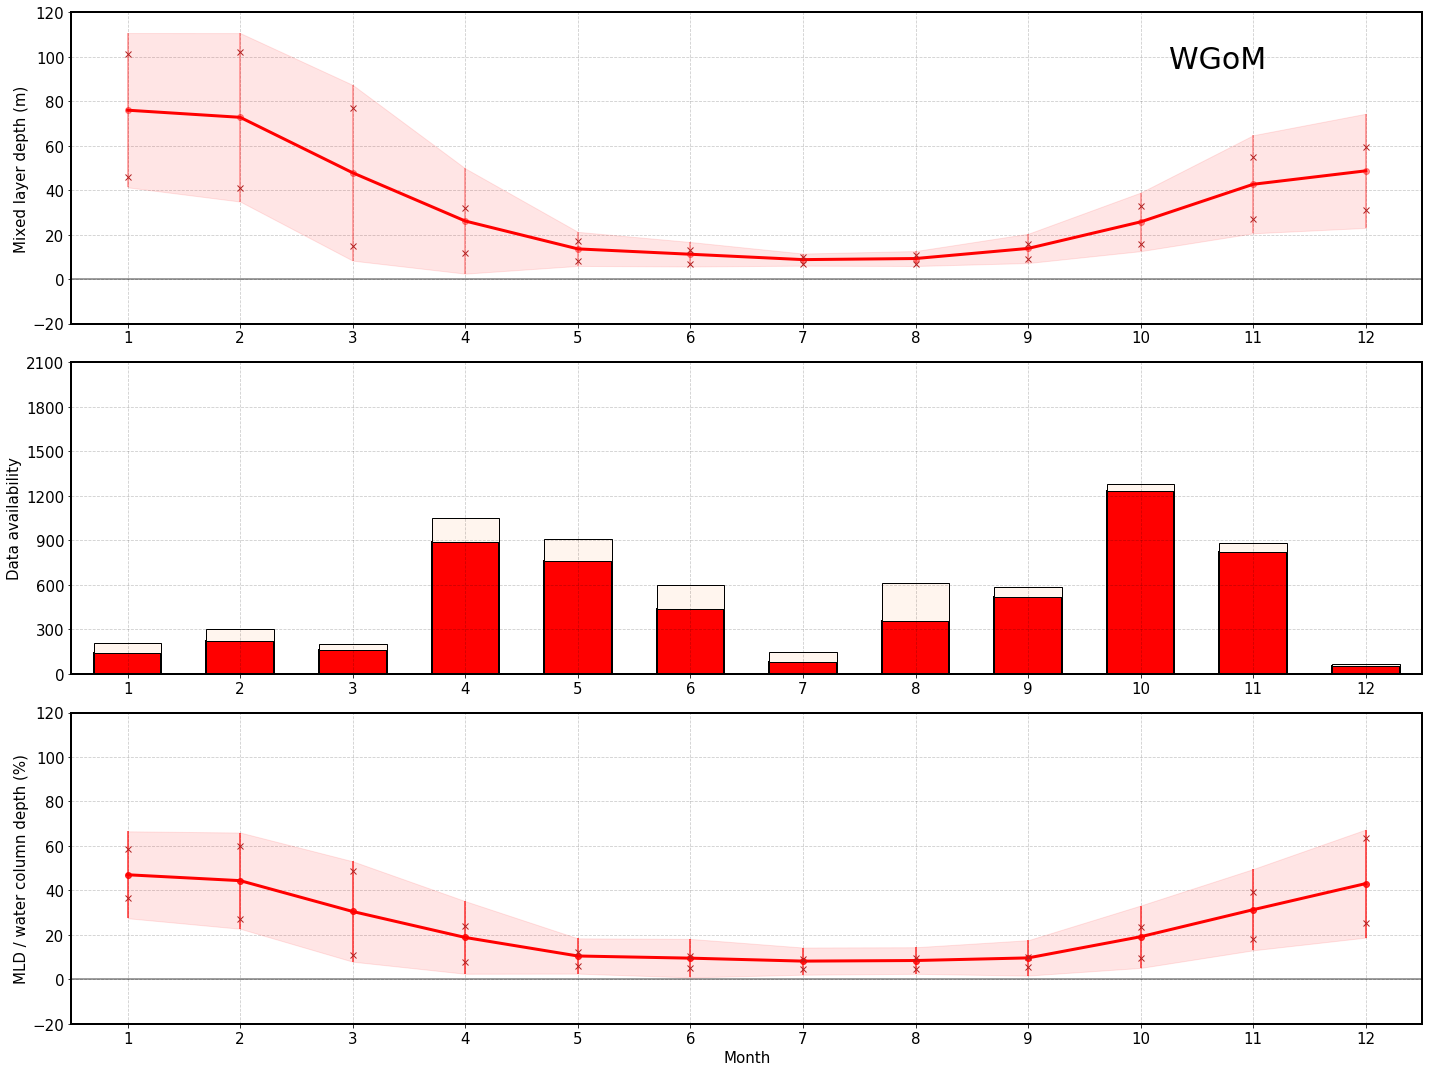

In [364]:
plt.figure(figsize=(20,15))
plt.figure(1)

plt.subplot(311)
plt.ylim(-20,120)
plt.xlim(0.5,12.5)
plt.plot(month, t_mld_mean, linestyle='-', color='red', linewidth=3,alpha = 1, zorder= 30) #
plt.scatter(month, t_mld_q25, marker = 'x', color='firebrick', linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, t_mld_q75, marker = 'x', color='firebrick', linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,t_mld_mean, t_mld_std,linestyle='None', marker='o',color='red',alpha= 0.4, markersize=6, zorder = 30)
plt.fill_between(month, t_mean_asarray - t_std_asarray, t_mean_asarray + t_std_asarray,color = 'red', alpha = 0.1,zorder = 30)
# plt.plot(month, mld_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30) #
# plt.scatter(month, mld_q25, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
# plt.scatter(month, mld_q75, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
# plt.errorbar(month,mld_mean, mld_std,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
# plt.fill_between(month, mean_asarray - std_asarray, mean_asarray + std_asarray,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Month', fontsize = 15)
plt.ylabel('Mixed layer depth (m)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(10.25, 95, 'WGoM', dict(size=30))

plt.subplot(312)
plt.xlim(0.5,12.5)
plt.ylim(0,2100)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([0,300,600,900,1200,1500,1800,2100], fontsize = 15) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Month', fontsize = 15)
plt.ylabel('Data availability', fontsize = 15)
# plt.bar(month, seasonyeardepth_len, color='darkblue', edgecolor='black', width = 0.6)
# plt.bar(month, diff, bottom=seasonyeardepth_len, color='aliceblue', edgecolor='black', width=0.6)
plt.bar(month, t_seasonyeardepth_len, color='red', edgecolor='black', width = 0.6, linewidth = 2)
# plt.bar(month, t_seasonyeardepth_len, color='none', edgecolor='red', width = 0.6, linewidth = 2)
plt.bar(month, t_diff, bottom=t_seasonyeardepth_len, color='seashell', edgecolor='black', width=0.6)

plt.subplot(313)
plt.ylim(-0.2,1.2)
plt.xlim(0.5,12.5)
plt.plot(month, t_ratio_mean100, linestyle='-', color='red', linewidth=3,alpha = 1, zorder= 30)
plt.scatter(month, t_ratio_q25100, marker = 'x', color='firebrick', linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, t_ratio_q75100, marker = 'x', color='firebrick', linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,t_ratio_mean100, t_ratio_std100,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, t_mean_ratio_asarray - t_std_ratio_asarray, t_mean_ratio_asarray + t_std_ratio_asarray,color = 'red', alpha = 0.1,zorder = 30)

# plt.plot(month, ratio_mean100, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
# plt.scatter(month, ratio_q25100, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
# plt.scatter(month, ratio_q75100, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
# plt.errorbar(month,ratio_mean100, ratio_std100,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
# plt.fill_between(month, mean_ratio_asarray - std_ratio_asarray, mean_ratio_asarray + std_ratio_asarray,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('MLD / water column depth (%)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
# plt.text(10.25, 95, 'GB', dict(size=30))

plt.savefig('seasonal_EGoM')
plt.show()

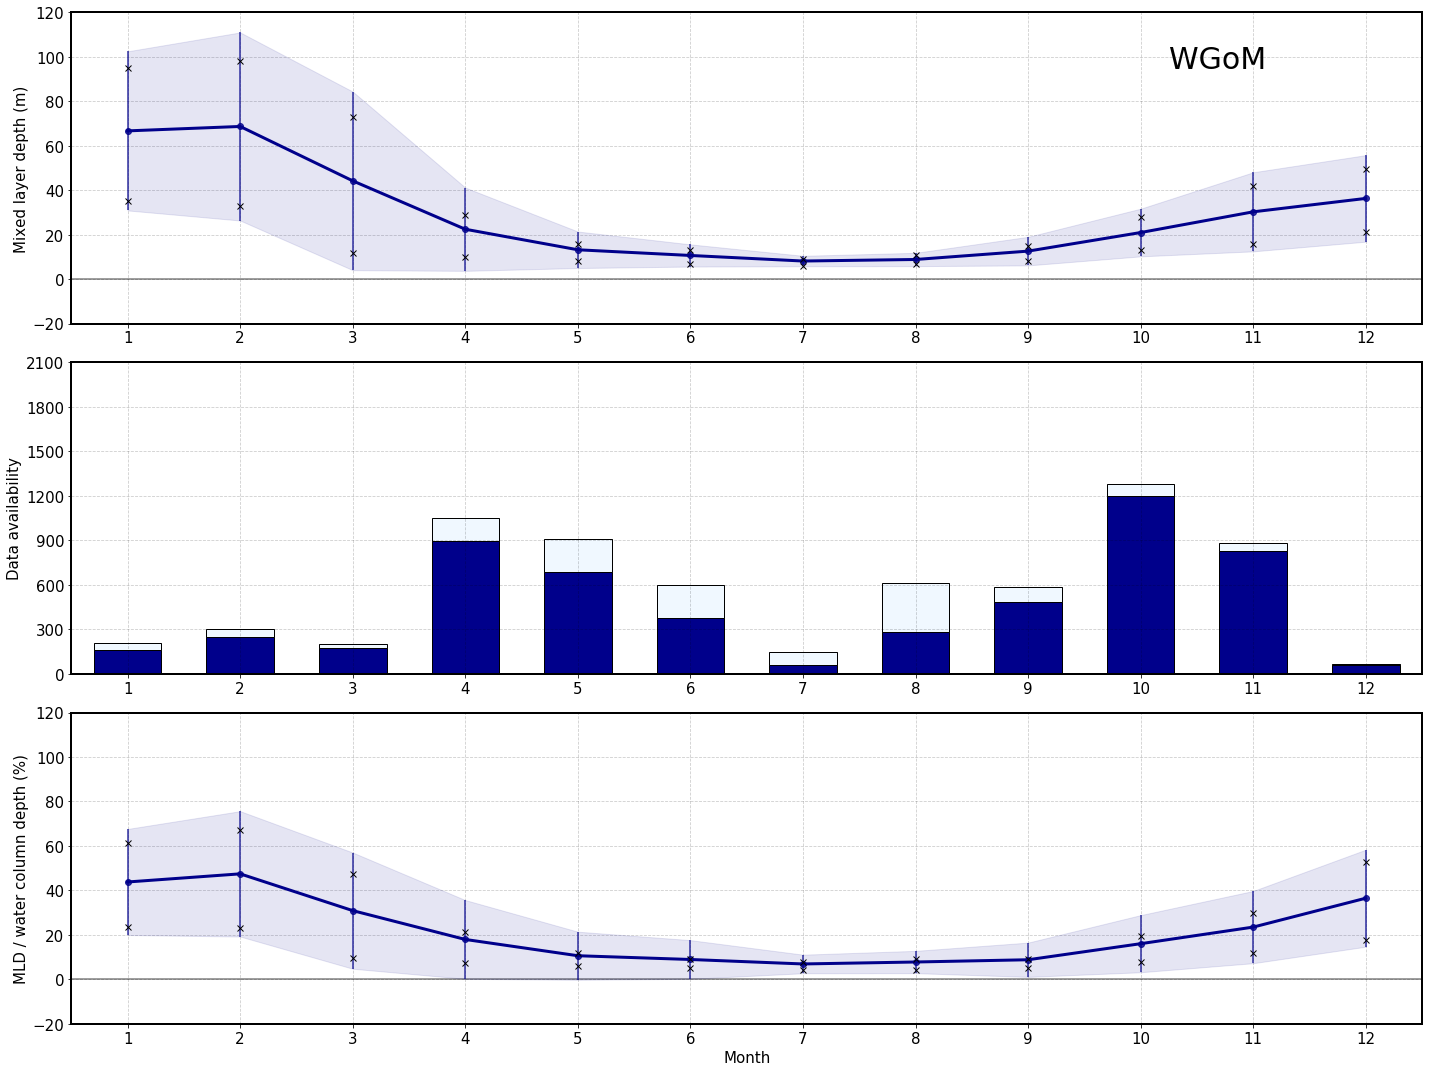

In [365]:
plt.figure(figsize=(20,15))
plt.figure(1)

plt.subplot(311)
plt.ylim(-20,120)
plt.xlim(0.5,12.5)
# plt.plot(month, t_mld_mean, linestyle='-', color='red', linewidth=3,alpha = 1, zorder= 30) #
# plt.scatter(month, t_mld_q25, marker = 'x', color='firebrick', linewidth=1,alpha = 1, zorder= 60)
# plt.scatter(month, t_mld_q75, marker = 'x', color='firebrick', linewidth=1,alpha = 1, zorder= 60)
# plt.errorbar(month,t_mld_mean, t_mld_std,linestyle='None', marker='o',color='red',alpha= 0.4, markersize=6, zorder = 30)
# plt.fill_between(month, t_mean_asarray - t_std_asarray, t_mean_asarray + t_std_asarray,color = 'red', alpha = 0.1,zorder = 30)
plt.plot(month, mld_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30) #
plt.scatter(month, mld_q25, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, mld_q75, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,mld_mean, mld_std,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, mean_asarray - std_asarray, mean_asarray + std_asarray,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Month', fontsize = 15)
plt.ylabel('Mixed layer depth (m)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(10.25, 95, 'WGoM', dict(size=30))

plt.subplot(312)
plt.xlim(0.5,12.5)
plt.ylim(0,2100)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([0,300,600,900,1200,1500,1800,2100], fontsize = 15) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Month', fontsize = 15)
plt.ylabel('Data availability', fontsize = 15)
plt.bar(month, seasonyeardepth_len, color='darkblue', edgecolor='black', width = 0.6)
plt.bar(month, diff, bottom=seasonyeardepth_len, color='aliceblue', edgecolor='black', width=0.6)
# plt.bar(month, t_seasonyeardepth_len, color='red', edgecolor='black', width = 0.6, linewidth = 2)
# # plt.bar(month, t_seasonyeardepth_len, color='none', edgecolor='red', width = 0.6, linewidth = 2)
# plt.bar(month, t_diff, bottom=t_seasonyeardepth_len, color='seashell', edgecolor='black', width=0.6)

plt.subplot(313)
plt.ylim(-0.2,1.2)
plt.xlim(0.5,12.5)
# plt.plot(month, t_ratio_mean100, linestyle='-', color='red', linewidth=3,alpha = 1, zorder= 30)
# plt.scatter(month, t_ratio_q25100, marker = 'x', color='firebrick', linewidth=1,alpha = 1, zorder= 60)
# plt.scatter(month, t_ratio_q75100, marker = 'x', color='firebrick', linewidth=1,alpha = 1, zorder= 60)
# plt.errorbar(month,t_ratio_mean100, ratio_std100,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=6, zorder = 30)
# plt.fill_between(month, t_mean_ratio_asarray - t_std_ratio_asarray, t_mean_ratio_asarray + t_std_ratio_asarray,color = 'red', alpha = 0.1,zorder = 30)

plt.plot(month, ratio_mean100, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
plt.scatter(month, ratio_q25100, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, ratio_q75100, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,ratio_mean100, ratio_std100,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, mean_ratio_asarray - std_ratio_asarray, mean_ratio_asarray + std_ratio_asarray,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('MLD / water column depth (%)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
# plt.text(10.25, 95, 'GB', dict(size=30))

plt.savefig('seasonal_EGoM')
plt.show()

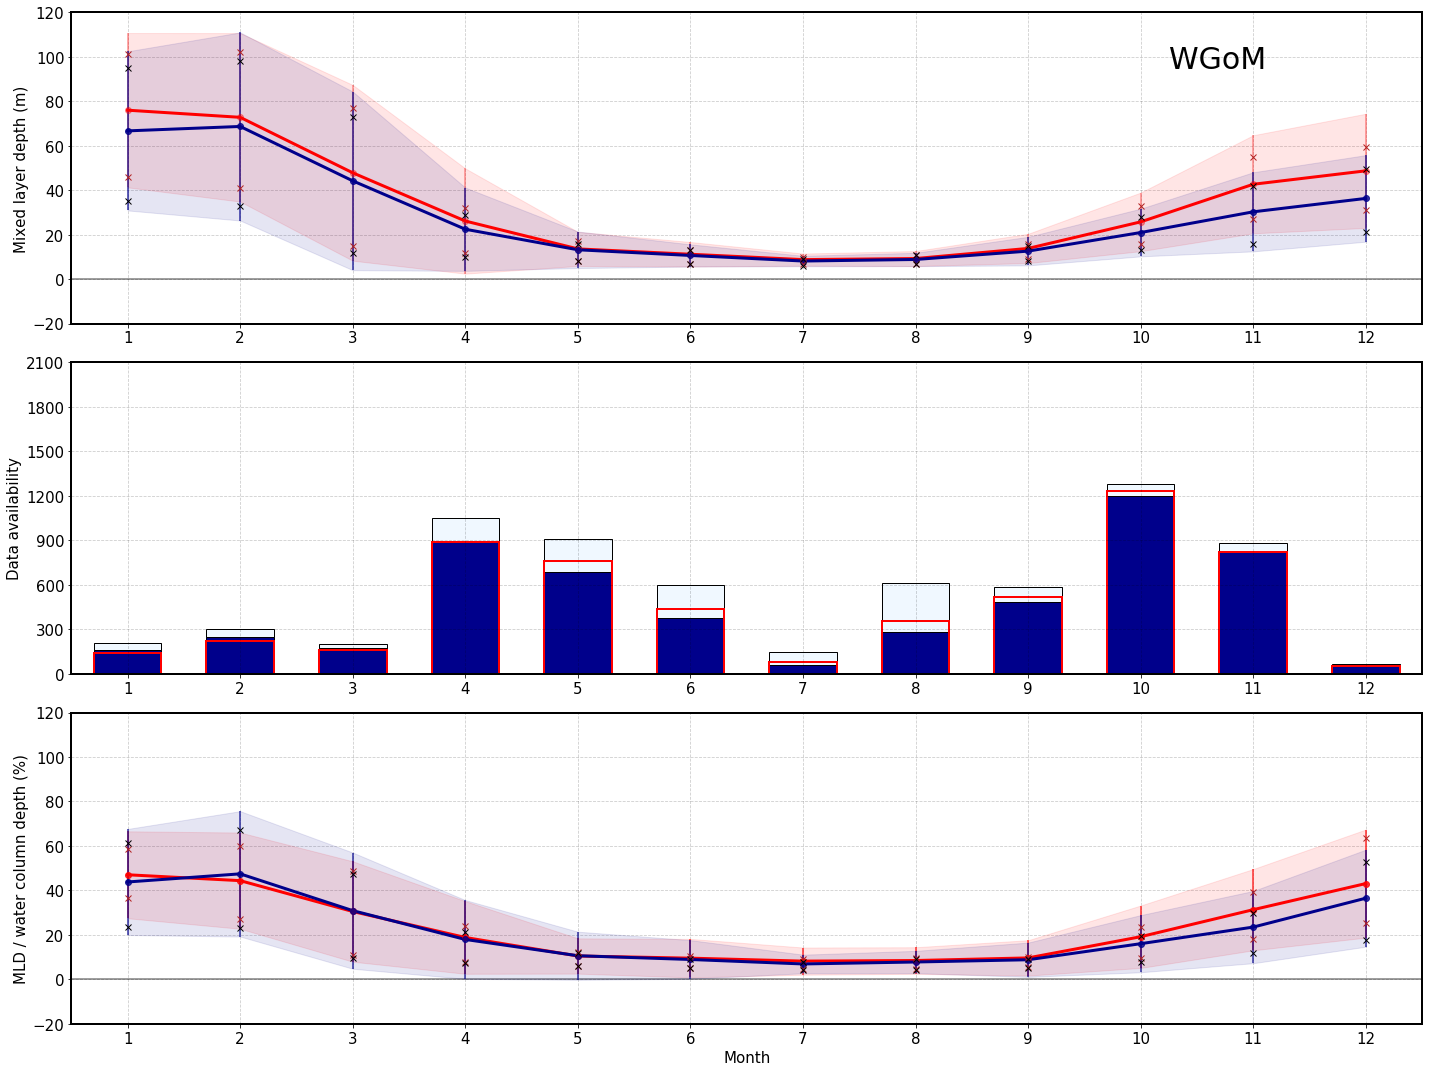

In [366]:
plt.figure(figsize=(20,15))
plt.figure(1)

plt.subplot(311)
plt.ylim(-20,120)
plt.xlim(0.5,12.5)
plt.plot(month, t_mld_mean, linestyle='-', color='red', linewidth=3,alpha = 1, zorder= 30) #
plt.scatter(month, t_mld_q25, marker = 'x', color='firebrick', linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, t_mld_q75, marker = 'x', color='firebrick', linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,t_mld_mean, t_mld_std,linestyle='None', marker='o',color='red',alpha= 0.4, markersize=6, zorder = 30)
plt.fill_between(month, t_mean_asarray - t_std_asarray, t_mean_asarray + t_std_asarray,color = 'red', alpha = 0.1,zorder = 30)
plt.plot(month, mld_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30) #
plt.scatter(month, mld_q25, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, mld_q75, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,mld_mean, mld_std,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, mean_asarray - std_asarray, mean_asarray + std_asarray,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Month', fontsize = 15)
plt.ylabel('Mixed layer depth (m)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(10.25, 95, 'WGoM', dict(size=30))

plt.subplot(312)
plt.xlim(0.5,12.5)
plt.ylim(0,2100)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([0,300,600,900,1200,1500,1800,2100], fontsize = 15) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
# plt.xlabel('Month', fontsize = 15)
plt.ylabel('Data availability', fontsize = 15)
plt.bar(month, seasonyeardepth_len, color='darkblue', edgecolor='black', width = 0.6)
plt.bar(month, diff, bottom=seasonyeardepth_len, color='aliceblue', edgecolor='black', width=0.6)
# plt.bar(month, t_seasonyeardepth_len, color='red', edgecolor='black', width = 0.6, linewidth = 2)
plt.bar(month, t_seasonyeardepth_len, color='none', edgecolor='red', width = 0.6, linewidth = 2)
# plt.bar(month, t_diff, bottom=t_seasonyeardepth_len, color='seashell', edgecolor='black', width=0.6)

plt.subplot(313)
plt.ylim(-0.2,1.2)
plt.xlim(0.5,12.5)
plt.plot(month, t_ratio_mean100, linestyle='-', color='red', linewidth=3,alpha = 1, zorder= 30)
plt.scatter(month, t_ratio_q25100, marker = 'x', color='firebrick', linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, t_ratio_q75100, marker = 'x', color='firebrick', linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,t_ratio_mean100, t_ratio_std100,linestyle='None', marker='o',color='red',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, t_mean_ratio_asarray - t_std_ratio_asarray, t_mean_ratio_asarray + t_std_ratio_asarray,color = 'red', alpha = 0.1,zorder = 30)

plt.plot(month, ratio_mean100, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
plt.scatter(month, ratio_q25100, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, ratio_q75100, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,ratio_mean100, ratio_std100,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, mean_ratio_asarray - std_ratio_asarray, mean_ratio_asarray + std_ratio_asarray,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('MLD / water column depth (%)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
# plt.text(10.25, 95, 'GB', dict(size=30))

plt.savefig('seasonal_EGoM')
plt.show()

In [367]:
print(len(D))

12


In [380]:
print(np.max(C))
print(np.min(C))

print(np.max(D100))
print(np.min(D100))

12.406388361796331
0.3999855534752541
7.830909405824086
-3.058011468943561


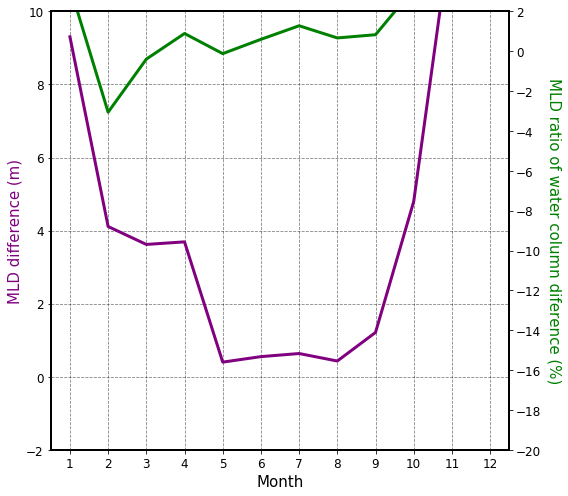

In [369]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

fig, ax1 = plt.subplots(figsize=(8, 7))
plt.xlim(0.5,12.5)
# ax1.set_ylim((-10, 2))

ax2 = ax1.twinx()
ax1.plot(month, C, 'purple',linewidth  = 3)
ax2.plot(month, D100, 'green', linewidth = 3)

ax1.set_xlabel('Month',fontsize = 15)
ax1.set_ylabel('MLD difference (m)', color='purple', fontsize = 15)
ax2.set_ylabel('MLD ratio of water column diference (%)', color='green', fontsize = 15,rotation=270,labelpad = 20)
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12]) 
# ax2.set_yticks([-2,0,2,4,6,8,10,12,14,16,18,20]) 
ax2.set_yticks([-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2]) 
ax1.set_yticks([-2,0,2,4,6,8,10]) 
ax1.set_ylim((-2, 10))
ax2.set_ylim((-20, 2))
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax1.grid(linestyle='--',color='black',alpha = 0.5)
plt.savefig('seasonal_EGoM')

plt.show()

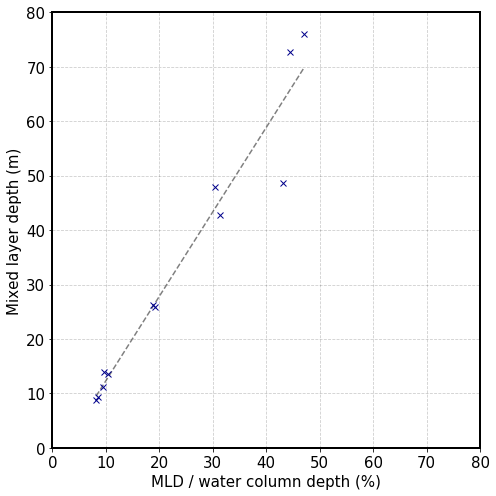

In [375]:
plt.figure(figsize=(7,7))
plt.ylim(0,80)

plt.scatter(t_ratio_mean100, t_mld_mean, marker = 'x', color='darkblue', linewidth=1,alpha = 1, zorder= 60)
plt.xlabel('MLD / water column depth (%)', fontsize = 15)
plt.ylabel('Mixed layer depth (m)', fontsize = 15)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.plot(np.unique(t_ratio_mean100), np.poly1d(np.polyfit(t_ratio_mean100, t_mld_mean, 1))(np.unique(t_ratio_mean100)),alpha = 0.5, color = 'black', linestyle = '--')
plt.xticks([0,10,20, 30,40,50,60,70,80], fontsize = 15) 
plt.yticks([0,10,20, 30,40,50,60,70,80], fontsize = 15) 
plt.savefig('NMAB_scatter')
plt.show()

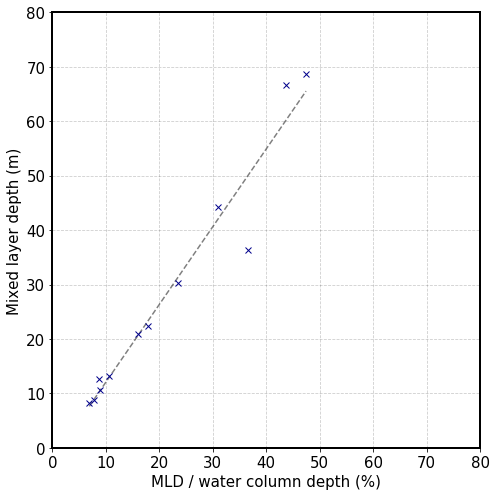

In [376]:
plt.figure(figsize=(7,7))
plt.ylim(0,80)

plt.scatter(ratio_mean100, mld_mean, marker = 'x', color='darkblue', linewidth=1,alpha = 1, zorder= 60)
plt.xlabel('MLD / water column depth (%)', fontsize = 15)
plt.ylabel('Mixed layer depth (m)', fontsize = 15)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.plot(np.unique(ratio_mean100), np.poly1d(np.polyfit(ratio_mean100, mld_mean, 1))(np.unique(ratio_mean100)),alpha = 0.5, color = 'black', linestyle = '--')
plt.xticks([0,10,20, 30,40,50,60,70,80], fontsize = 15) 
plt.yticks([0,10,20, 30,40,50,60,70,80], fontsize = 15) 
plt.savefig('NMAB_scatter')
plt.show()

In [377]:
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return a, b

In [378]:
a, b = best_fit(t_ratio_mean100, t_mld_mean)

best fit line:
y = -3.22 + 1.55x


In [379]:
a, b = best_fit(ratio_mean100, mld_mean)

best fit line:
y = -2.25 + 1.43x


In [ ]:
y = -4.51 + 0.78x

In [ ]:
# temp-based
t_seasonyeardepth_len = []
t_countwithinpolygon_list = []
t_diff = []
t_mld_mean = []
t_mld_std = []
t_mld_max = []
t_mld_min = []
t_mld_q25 = []
t_mld_q75 = []

t_ratio_mean = []
t_ratio_std = []
t_ratio_max = []
t_ratio_min = []
t_ratio_q25 = []
t_ratio_q75 = []